<a href="https://colab.research.google.com/github/shruthimohan03/Loan_approval_kaggle/blob/main/XGBoost_imbalance.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [72]:
import pandas as pd
data=pd.read_csv('/content/train.csv')
data.head()

,id,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length,loan_status
0,0,37,35000,RENT,0.0,EDUCATION,B,6000,11.49,0.17,N,14,0
1,1,22,56000,OWN,6.0,MEDICAL,C,4000,13.35,0.07,N,2,0
2,2,29,28800,OWN,8.0,PERSONAL,A,6000,8.90,0.21,N,10,0
3,3,30,70000,RENT,14.0,VENTURE,B,12000,11.11,0.17,N,5,0
4,4,22,60000,RENT,2.0,MEDICAL,A,6000,6.92,0.10,N,3,0


In [73]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 58645 entries, 0 to 58644
Data columns (total 13 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   id                          58645 non-null  int64  
 1   person_age                  58645 non-null  int64  
 2   person_income               58645 non-null  int64  
 3   person_home_ownership       58645 non-null  object 
 4   person_emp_length           58645 non-null  float64
 5   loan_intent                 58645 non-null  object 
 6   loan_grade                  58645 non-null  object 
 7   loan_amnt                   58645 non-null  int64  
 8   loan_int_rate               58645 non-null  float64
 9   loan_percent_income         58645 non-null  float64
 10  cb_person_default_on_file   58645 non-null  object 
 11  cb_person_cred_hist_length  58645 non-null  int64  
 12  loan_status                 58645 non-null  int64  
dtypes: float64(3), int64(6), object

In [74]:
# prompt: check imbalance class in column 'loan_status'

loan_status_counts = data['loan_status'].value_counts()
print(loan_status_counts)
print("\nPercentage of each class:")
print(loan_status_counts / len(data) * 100)
ratio_of_majority_to_minority_class = 50295 / 8350

loan_status
0    50295
1     8350
Name: count, dtype: int64

Percentage of each class:
loan_status
0    85.761787
1    14.238213
Name: count, dtype: float64


In [54]:
# prompt: outlier removal using iqr

import numpy as np

# Calculate the IQR for each numerical feature
for column in data.select_dtypes(include=np.number):
  Q1 = data[column].quantile(0.25)
  Q3 = data[column].quantile(0.75)
  IQR = Q3 - Q1
  lower_bound = Q1 - 1.5 * IQR
  upper_bound = Q3 + 1.5 * IQR

  # Remove outliers
  data = data[(data[column] >= lower_bound) & (data[column] <= upper_bound)]

# Print the updated DataFrame
print(data)


          id  person_age  person_income person_home_ownership  \
1          1          22          56000                   OWN   
2          2          29          28800                   OWN   
3          3          30          70000                  RENT   
4          4          22          60000                  RENT   
5          5          27          45000                  RENT   
...      ...         ...            ...                   ...   
58636  58636          24          37000                  RENT   
58637  58637          24          75000                  RENT   
58639  58639          22          70000                  RENT   
58643  58643          22          30000                  RENT   
58644  58644          31          75000              MORTGAGE   

       person_emp_length        loan_intent loan_grade  loan_amnt  \
1                    6.0            MEDICAL          C       4000   
2                    8.0           PERSONAL          A       6000   
3           

Checking if more salary leads to better chance of loan approval

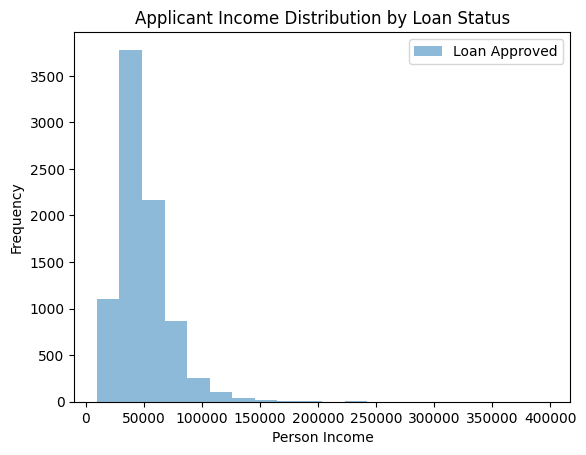

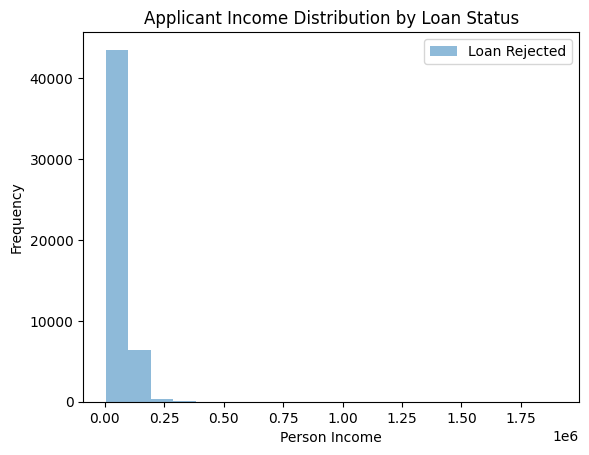

Average income for approved loans: 48224.661796407185
Average income for rejected loans: 66672.86772044934
Potential income threshold for loan approval: 44000.0


In [75]:
# prompt: I want to check if there is a threshold above which if a person_income meets then the loan is approved (1)

import matplotlib.pyplot as plt

# Assuming 'Loan_Status' is your target variable (1 for approved, 0 for not approved)
# and 'ApplicantIncome' is the income feature

# Group data by Loan_Status and get the distribution of ApplicantIncome
loan_approved = data[data['loan_status'] == 1]['person_income']
loan_rejected = data[data['loan_status'] == 0]['person_income']


# Plot the histograms of income for approved and rejected loans
plt.hist(loan_approved, bins=20, alpha=0.5, label='Loan Approved')
plt.xlabel('Person Income')
plt.ylabel('Frequency')
plt.legend(loc='upper right')
plt.title('Applicant Income Distribution by Loan Status')
plt.show()

plt.hist(loan_rejected, bins=20, alpha=0.5, label='Loan Rejected')
plt.xlabel('Person Income')
plt.ylabel('Frequency')
plt.legend(loc='upper right')
plt.title('Applicant Income Distribution by Loan Status')
plt.show()

# Calculate the average income for approved and rejected loans
avg_income_approved = loan_approved.mean()
avg_income_rejected = loan_rejected.mean()

print(f"Average income for approved loans: {avg_income_approved}")
print(f"Average income for rejected loans: {avg_income_rejected}")

# Find the threshold income where most loans are approved.
# You can use various methods like finding the median or mean of the approved loans
# or using a more advanced technique like logistic regression.

threshold = loan_approved.median()
print(f"Potential income threshold for loan approval: {threshold}")

# You can then analyze the data further to check if the loans are consistently
# approved above this threshold.


Preprocessing: Label Encoding

In [63]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder, MinMaxScaler

# Create a LabelEncoder object
le = LabelEncoder()

# Iterate through the columns and apply label encoding to object type columns
for column in data.columns:
  if data[column].dtype == object:
    data[column] = le.fit_transform(data[column])

Normalization

In [64]:
# Create a MinMaxScaler object
scaler = MinMaxScaler()

# Fit and transform the data using the scaler
data_normalized = pd.DataFrame(scaler.fit_transform(data), columns=data.columns)

print(data_normalized.head())


         id  person_age  person_income  person_home_ownership  \
0  0.000000    0.165049       0.016246               1.000000   
1  0.000017    0.019417       0.027324               0.666667   
2  0.000034    0.087379       0.012976               0.666667   
3  0.000051    0.097087       0.034708               1.000000   
4  0.000068    0.019417       0.029433               1.000000   

   person_emp_length  loan_intent  loan_grade  loan_amnt  loan_int_rate  \
0           0.000000          0.2    0.166667   0.159420       0.341011   
1           0.048780          0.6    0.333333   0.101449       0.445506   
2           0.065041          0.8    0.000000   0.159420       0.195506   
3           0.113821          1.0    0.166667   0.333333       0.319663   
4           0.016260          0.6    0.000000   0.159420       0.084270   

   loan_percent_income  cb_person_default_on_file  cb_person_cred_hist_length  \
0             0.204819                        0.0                    0.428571

In [ ]:
# prompt: suggest a model to train the above data

# Based on the provided data and the task of predicting loan status,
# I would suggest using a Logistic Regression model or a Random Forest model.

# Logistic Regression:
# - It's a suitable choice for binary classification problems like loan approval/rejection.
# - It can handle both numerical and categorical features effectively.
# - It provides interpretable results, allowing us to understand the impact of different features on the outcome.

# Random Forest:
# - It's a powerful ensemble method that can handle complex relationships in the data.
# - It's less prone to overfitting compared to individual decision trees.
# - It can handle both numerical and categorical features well.


# Example code to train a Logistic Regression model:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report

# Assuming 'loan_status' is your target variable (y) and the rest are features (X)
X = data_normalized.drop('loan_status', axis=1)
y = data_normalized['loan_status']

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create and train the Logistic Regression model
model = LogisticRegression()
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy}")
print(classification_report(y_test, y_pred))



# You can also try a Random Forest model by replacing the LogisticRegression
# with an ensemble method like RandomForestClassifier from sklearn.ensemble.
# The general steps for training and evaluating a model remain the same.



Training a random forest model

In [6]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

# Assuming you have a target variable column named 'loan_status'
X = data_normalized.drop('loan_status', axis=1)  # Replace 'target' with your target variable column name
y = data_normalized['loan_status']  # Replace 'target' with your target variable column name

# Create a Random Forest Classifier
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)

# Train the model
rf_model.fit(X, y)

RandomForestClassifier(random_state=42)

XG Boost Classifier

In [38]:
import xgboost as xgb

# Create an XGBoost classifier
xgb_model = xgb.XGBClassifier(objective='binary:logistic', random_state=42)

# Train the model
xgb_model.fit(X, y)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=42, ...)

Logistic Regression

In [6]:
X = data_normalized.drop('loan_status', axis=1)  # Replace 'target' with your target variable column name
y = data_normalized['loan_status']  # Replace 'target' with your target variable column name

from sklearn.linear_model import LogisticRegression

# Create a Logistic Regression model
lr_model = LogisticRegression(max_iter=1000, random_state=42)

# Train the model
lr_model.fit(X, y)


LogisticRegression(max_iter=1000, random_state=42)

XG BOOST + TREATING IMBALANCE CLASS PROBLEM (Using Class Weights in Models)

In [67]:
from xgboost import XGBClassifier
clf = XGBClassifier(scale_pos_weight=ratio_of_majority_to_minority_class)
clf.fit(X, y)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

Importing the test data

In [68]:
test_data=pd.read_csv('/content/test.csv')
test_data.head()

,id,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length
0,58645,23,69000,RENT,3.0,HOMEIMPROVEMENT,F,25000,15.76,0.36,N,2
1,58646,26,96000,MORTGAGE,6.0,PERSONAL,C,10000,12.68,0.10,Y,4
2,58647,26,30000,RENT,5.0,VENTURE,E,4000,17.19,0.13,Y,2
3,58648,33,50000,RENT,4.0,DEBTCONSOLIDATION,A,7000,8.90,0.14,N,7
4,58649,26,102000,MORTGAGE,8.0,HOMEIMPROVEMENT,D,15000,16.32,0.15,Y,4


Preprocessing and normalizing

In [69]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder, MinMaxScaler

# Create a LabelEncoder object
le = LabelEncoder()

# Iterate through the columns and apply label encoding to object type columns
for column in test_data.columns:
  if test_data[column].dtype == object:
    test_data[column] = le.fit_transform(test_data[column])

# Create a MinMaxScaler object
scaler = MinMaxScaler()

# Fit and transform the data using the scaler
test_data_normalized = pd.DataFrame(scaler.fit_transform(test_data), columns=test_data.columns)

print(test_data_normalized.head())

         id  person_age  person_income  person_home_ownership  \
0  0.000000    0.040541       0.034283                    1.0   
1  0.000026    0.081081       0.048523                    0.0   
2  0.000051    0.081081       0.013713                    1.0   
3  0.000077    0.175676       0.024262                    1.0   
4  0.000102    0.081081       0.051688                    0.0   

   person_emp_length  loan_intent  loan_grade  loan_amnt  loan_int_rate  \
0           0.071429          0.4    0.833333   0.708455       0.619533   
1           0.142857          0.8    0.333333   0.271137       0.434991   
2           0.119048          1.0    0.666667   0.096210       0.705213   
3           0.095238          0.0    0.000000   0.183673       0.208508   
4           0.190476          0.4    0.500000   0.416910       0.653086   

   loan_percent_income  cb_person_default_on_file  cb_person_cred_hist_length  
0             0.493151                        0.0                    0.000000 

TESTING THE MODEL ON RANDOM FOREST MODEL

In [14]:
# Make predictions on the test set
y_pred = rf_model.predict(test_data_normalized)

In [15]:
# prompt: i need to download a csv file with 'id' and 'loan_status' from the y_pred

import pandas as pd

# Create a DataFrame with 'id' and 'loan_status'
submission_df = pd.DataFrame({'id': test_data['id'], 'loan_status': y_pred})

# Save the DataFrame to a CSV file
submission_df.to_csv('submission_random_forest.csv', index=False)

# Download the CSV file
from google.colab import files
files.download('submission_random_forest.csv')


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

TESTING ON THE XGB BOOST

In [42]:
# Make predictions on the test set
y_pred = xgb_model.predict(test_data_normalized)

In [43]:
# prompt: i need to download a csv file with 'id' and 'loan_status' from the y_pred

import pandas as pd

# Create a DataFrame with 'id' and 'loan_status'
submission_df = pd.DataFrame({'id': test_data['id'], 'loan_status': y_pred})

# Save the DataFrame to a CSV file
submission_df.to_csv('submission_xgboost_outlier.csv', index=False)

# Download the CSV file
from google.colab import files
files.download('submission_xgboost_outlier.csv')


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

TESTING ON A LOGISTIC REGRESSION MODEL

In [9]:
# Make predictions on the test set
y_pred = lr_model.predict(test_data_normalized)

# Create a DataFrame with 'id' and 'loan_status'
submission_df = pd.DataFrame({'id': test_data['id'], 'loan_status': y_pred})

# Save the DataFrame to a CSV file
submission_df.to_csv('submission_logistic.csv', index=False)

# Download the CSV file
from google.colab import files
files.download('submission_logistic.csv')


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

TESTING ON XGBOOST WITH IMBALANCE CLASS TREATMENT

In [71]:
# Make predictions on the test set
y_pred = clf.predict(test_data_normalized)

# Create a DataFrame with 'id' and 'loan_status'
submission_df = pd.DataFrame({'id': test_data['id'], 'loan_status': y_pred})

# Save the DataFrame to a CSV file
submission_df.to_csv('submission_xgb_imbalance.csv', index=False)

# Download the CSV file
from google.colab import files
files.download('submission_xgb_imbalance.csv')


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Compare logistic and xgboost

In [11]:
xgboost=pd.read_csv('/content/submission_xgboost.csv')
logistic=pd.read_csv('/content/submission_logistic.csv')

In [12]:
# prompt: check accuracy of logistic wrt xgboost of the column 'loan_status'

accuracy = (xgboost['loan_status'] == logistic['loan_status']).mean()
print(f"Accuracy of logistic regression compared to XGBoost: {accuracy}")


Accuracy of logistic regression compared to XGBoost: 0.9078981022047163


Compare logistic and random forest

In [13]:
rf=pd.read_csv('/content/submission_random_forest.csv')
accuracy2 = (rf['loan_status'] == logistic['loan_status']).mean()
print(f"Accuracy of logistic regression compared to RF: {accuracy2}")

Accuracy of logistic regression compared to RF: 0.9203028287891963


I think logistic accuracy could be bad, will check it out later in the kaggle platform



Compare xgboost and xgboost after outlier removal

In [45]:
xgb_outlier=pd.read_csv('/content/submission_xgboost_outlier.csv')
accuracy3 = (xgb_outlier['loan_status'] == xgboost['loan_status']).mean()
print(accuracy3)

1.0


No point in outlier removal. XGBoost is quite robust to outliers compared to other models